In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\AI Sales Cross Selling and UpSelling.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,prefered_category,training_ID,training_type,training_name,trainer_name,training_total_meetings,training_price,discount_training,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,2,...,Finance Series,B0001,Finance Series,Cash Flow & Credit Management,Alam,8,3000000,0,Finance for Non Finance Executive,Cash Flow & Credit Management
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,3,...,HR Series,B0002,HR Series,People (HR) Analytics: For HR & Non HR Profess...,Reza,11,4000000,10,Planning and organizing for stellar performance,People (HR) Analytics: For HR & Non HR Profess...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,4,...,Training Series,B0003,Training Series,Comprehensive Train The Trainers,Haris,14,11000000,25,Train The Trainer For Outbond (Indoor-outdoor)...,Comprehensive Train The Trainers
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,2,...,HR Series,B0004,HR Series,Build A Great and Strong Corporate Culture,Reza,11,11000000,10,Planning and organizing for stellar performance,Build A Great and Strong Corporate Culture
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,Training Series,B0005,Training Series,Comprehensive Train The Trainers,Haris,17,11000000,50,Train The Trainer For Outbond (Indoor-outdoor)...,Comprehensive Train The Trainers


In [31]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_field                                5000 non-null   object 
 1   level_training_process                       5000 non-null   int64  
 2   purchasing_time_patterns                     5000 non-null   object 
 3   number_of_participants                       5000 non-null   int64  
 4   group                                        5000 non-null   object 
 5   total_payment                                5000 non-null   float64
 6   satisfaction                                 5000 non-null   int64  
 7   communication_channel                        5000 non-null   object 
 8   complaints                                   5000 non-null   object 
 9   communication_quality                        5000 non-null   object 
 10  

In [32]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

### Categorical Variables

C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


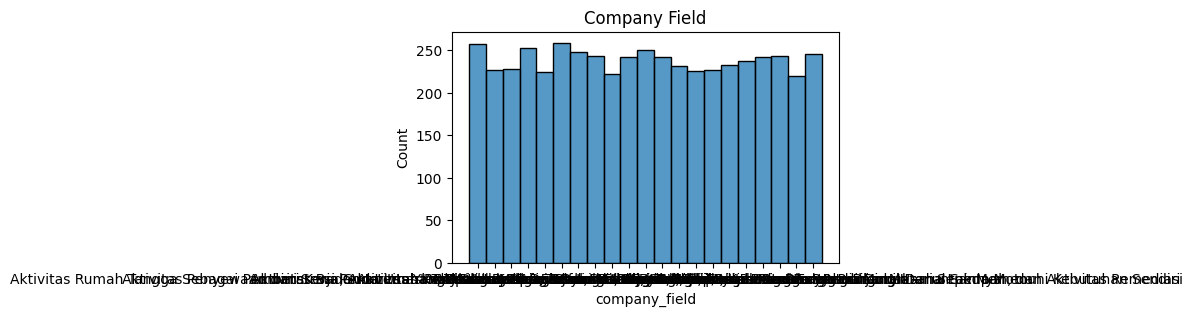

Aktivitas Penyewaan dan Sewa Guna Usaha Tanpa Hak Opsi, Ketenagakerjaan, Agen Perjalanan dan Penunjang Usaha Lainnya                                           259
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib                                                                                                 257
Aktivitas Kesehatan Manusia Dan Aktivitas Sosial                                                                                                               253
Informasi Dan Komunikasi                                                                                                                                       250
Aktivitas Profesional, Ilmiah Dan Teknis                                                                                                                       248
Treatment Air, Treatment Air Limbah, Treatment dan Pemulihan Material Sampah, dan Aktivitas Remediasi                                                          246
Aktivitas Rumah Tangga

In [33]:
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["company_field"], ax=ax)
ax.set_title("Company Field")
plt.show()
print(df["company_field"].value_counts())

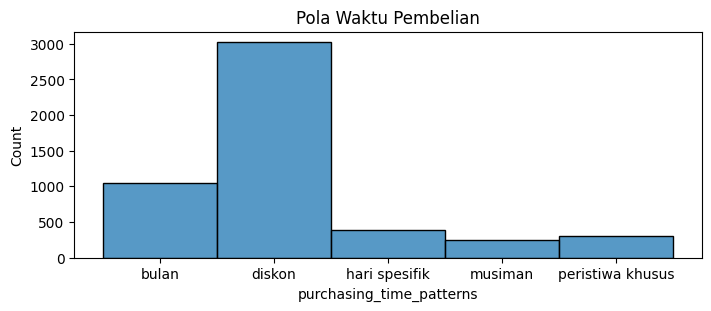

diskon              3018
bulan               1053
hari spesifik        383
peristiwa khusus     304
musiman              242
Name: purchasing_time_patterns, dtype: int64


In [57]:
fig, ax = plt.subplots(figsize=(7, 3), layout="constrained")
sns.histplot(data=df["purchasing_time_patterns"], ax=ax)
ax.set_title("Pola Waktu Pembelian")
plt.show()
print(df["purchasing_time_patterns"].value_counts())

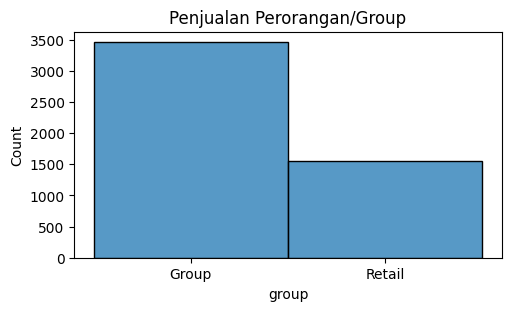

Group     3453
Retail    1547
Name: group, dtype: int64


In [35]:
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["group"], ax=ax)
ax.set_title("Penjualan Perorangan/Group")
plt.show()
print(df["group"].value_counts())

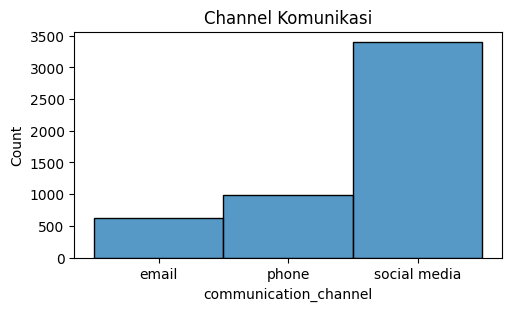

social media    3394
phone            982
email            624
Name: communication_channel, dtype: int64


In [36]:
# communication_channel
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["communication_channel"], ax=ax)
ax.set_title("Channel Komunikasi")
plt.show()
print(df["communication_channel"].value_counts())

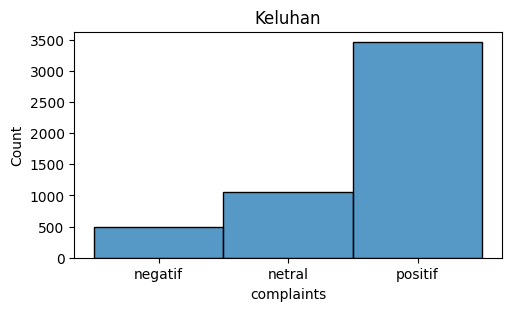

positif    3453
netral     1055
negatif     492
Name: complaints, dtype: int64


In [37]:
# complaints
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["complaints"], ax=ax)
ax.set_title("Keluhan")
plt.show()
print(df["complaints"].value_counts())

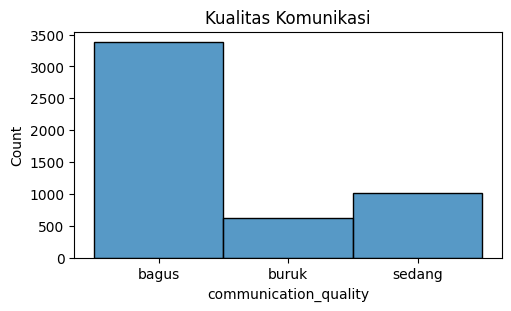

bagus     3376
sedang    1008
buruk      616
Name: communication_quality, dtype: int64


In [38]:
# communication_quality
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["communication_quality"], ax=ax)
ax.set_title("Kualitas Komunikasi")
plt.show()
print(df["communication_quality"].value_counts())

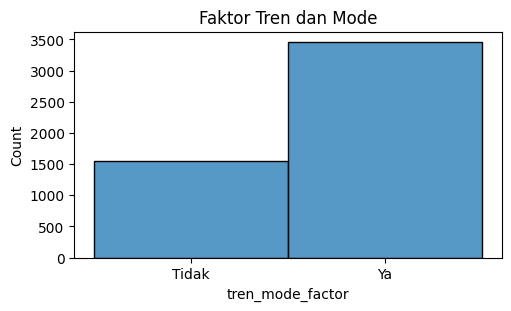

Ya       3453
Tidak    1547
Name: tren_mode_factor, dtype: int64


In [39]:
# tren_mode_factor 
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["tren_mode_factor"], ax=ax)
ax.set_title("Faktor Tren dan Mode")
plt.show()
print(df["tren_mode_factor"].value_counts())

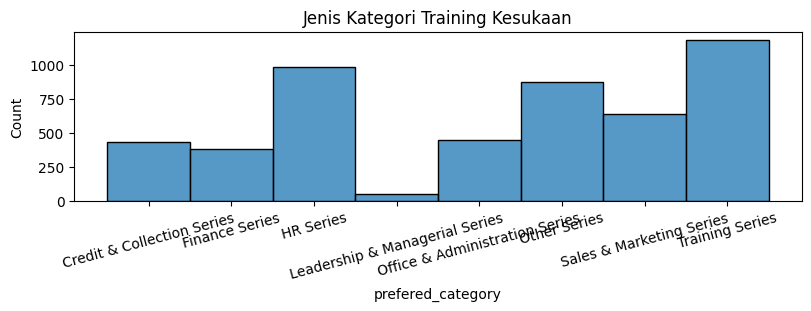

Training Series                   1186
HR Series                          986
Other Series                       872
Sales & Marketing Series           641
Office & Administration Series     450
Credit & Collection Series         435
Finance Series                     381
Leadership & Managerial Series      49
Name: prefered_category, dtype: int64


In [40]:
# prefered_category
fig, ax = plt.subplots(figsize=(8, 3), layout="constrained")
sns.histplot(data=df["prefered_category"], ax=ax)
ax.set_title("Jenis Kategori Training Kesukaan")
plt.xticks(rotation=15)
plt.show()
print(df["prefered_category"].value_counts())

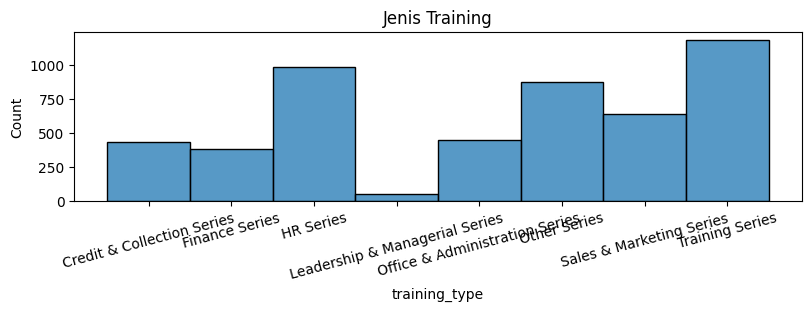

Training Series                   1186
HR Series                          986
Other Series                       872
Sales & Marketing Series           641
Office & Administration Series     450
Credit & Collection Series         435
Finance Series                     381
Leadership & Managerial Series      49
Name: training_type, dtype: int64


In [41]:
# training_type
fig, ax = plt.subplots(figsize=(8, 3), layout="constrained")
sns.histplot(data=df["training_type"], ax=ax)
ax.set_title("Jenis Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_type"].value_counts())

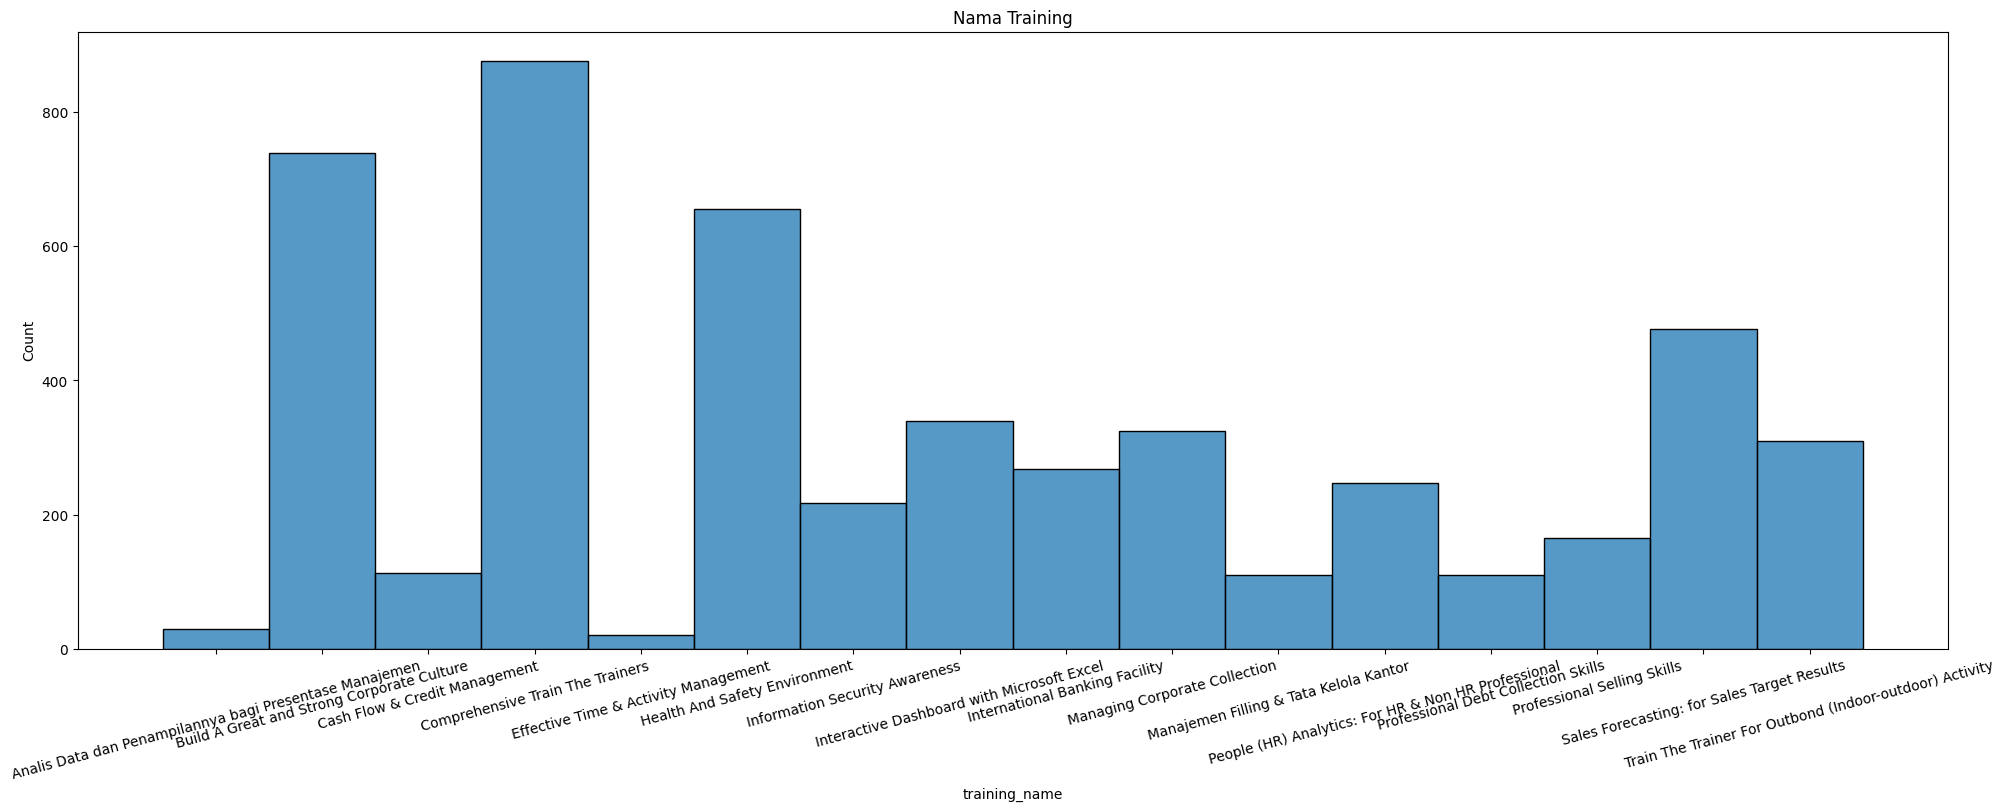

Comprehensive Train The Trainers                           876
Build A Great and Strong Corporate Culture                 739
Health And Safety Environment                              655
Sales Forecasting: for Sales Target Results                476
Interactive Dashboard with Microsoft Excel                 340
Managing Corporate Collection                              325
Train The Trainer For Outbond (Indoor-outdoor) Activity    310
International Banking Facility                             268
People (HR) Analytics: For HR & Non HR Professional        247
Information Security Awareness                             217
Professional Selling Skills                                165
Cash Flow & Credit Management                              113
Manajemen Filling & Tata Kelola Kantor                     110
Professional Debt Collection Skills                        110
Analis Data dan Penampilannya bagi Presentase Manajemen     29
Effective Time & Activity Management                   

In [42]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

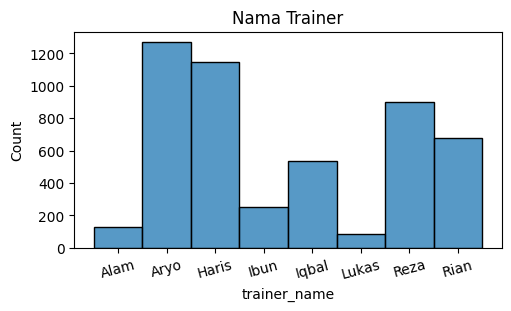

Aryo     1271
Haris    1149
Reza      899
Rian      678
Iqbal     535
Ibun      250
Alam      131
Lukas      87
Name: trainer_name, dtype: int64


In [43]:
# trainer_name
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["trainer_name"], ax=ax)
ax.set_title("Nama Trainer")
plt.xticks(rotation=15)
plt.show()
print(df["trainer_name"].value_counts())

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   company_field                                5000 non-null   category
 1   level_training_process                       5000 non-null   int64   
 2   purchasing_time_patterns                     5000 non-null   category
 3   number_of_participants                       5000 non-null   int64   
 4   group                                        5000 non-null   category
 5   total_payment                                5000 non-null   float64 
 6   satisfaction                                 5000 non-null   int64   
 7   communication_channel                        5000 non-null   category
 8   complaints                                   5000 non-null   category
 9   communication_quality                        5000 non-null   ca

### Numerical Variables

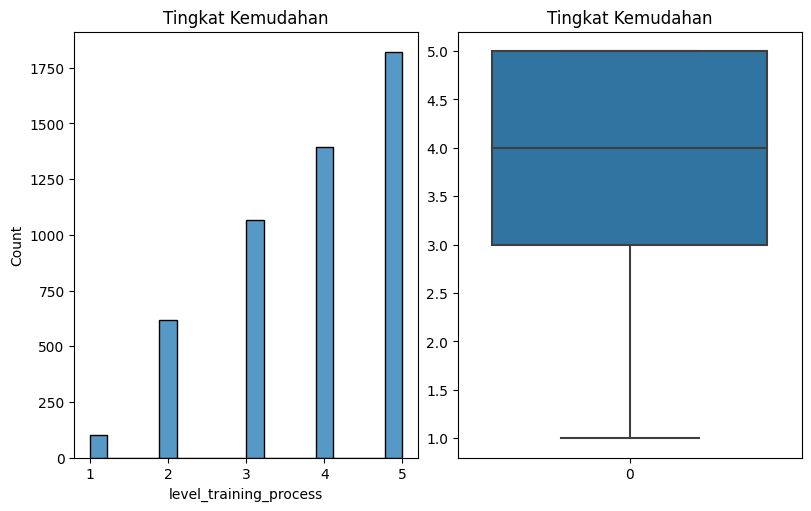

count    5000.000000
mean        3.842800
std         1.109024
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: level_training_process, dtype: float64


In [45]:
# level_training_process
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["level_training_process"], ax=ax[0])
sns.boxplot(data=df["level_training_process"], ax=ax[1])
ax[0].set_title("Tingkat Kemudahan")
ax[1].set_title("Tingkat Kemudahan")
plt.show()
print(df["level_training_process"].describe())

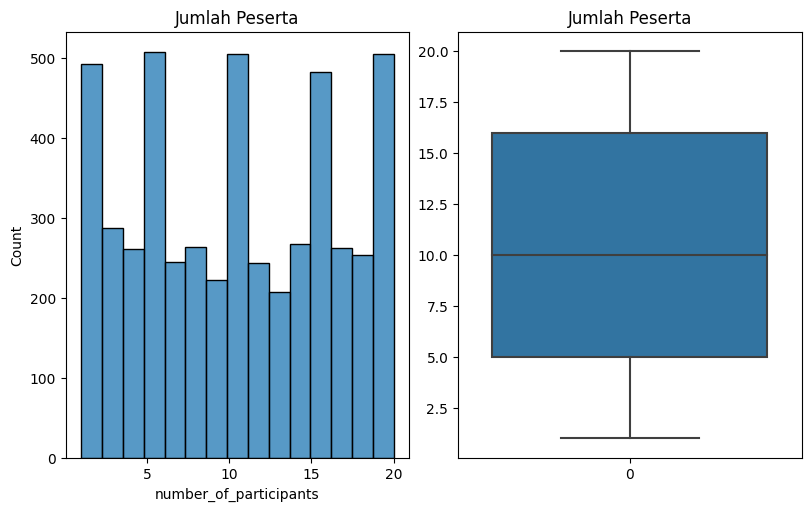

count    5000.000000
mean       10.441800
std         5.808973
min         1.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: number_of_participants, dtype: float64


In [46]:
#  number_of_participants
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["number_of_participants"], ax=ax[0])
sns.boxplot(data=df["number_of_participants"], ax=ax[1])
ax[0].set_title("Jumlah Peserta")
ax[1].set_title("Jumlah Peserta")
plt.show()
print(df["number_of_participants"].describe())

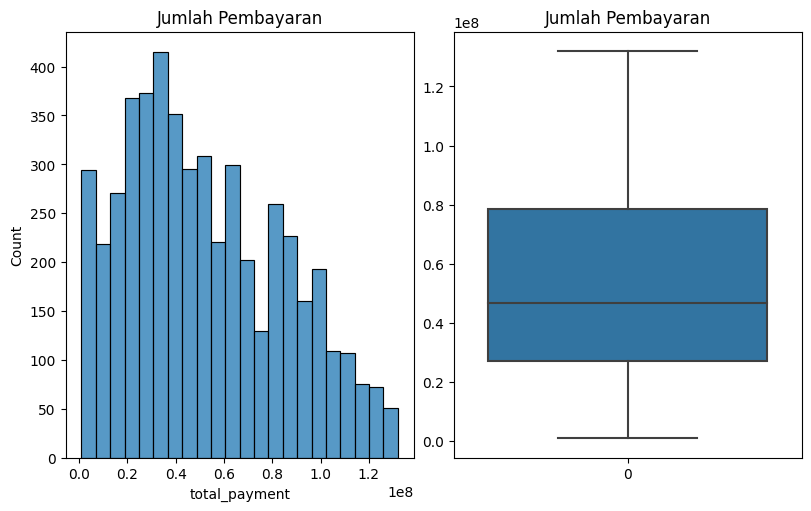

count    5.000000e+03
mean     5.229453e+07
std      3.249120e+07
min      1.000000e+06
25%      2.700000e+07
50%      4.680000e+07
75%      7.865000e+07
max      1.320000e+08
Name: total_payment, dtype: float64


In [47]:
#  total_payment
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["total_payment"], ax=ax[0])
sns.boxplot(data=df["total_payment"], ax=ax[1])
ax[0].set_title("Jumlah Pembayaran")
ax[1].set_title("Jumlah Pembayaran")
plt.show()
print(df["total_payment"].describe())

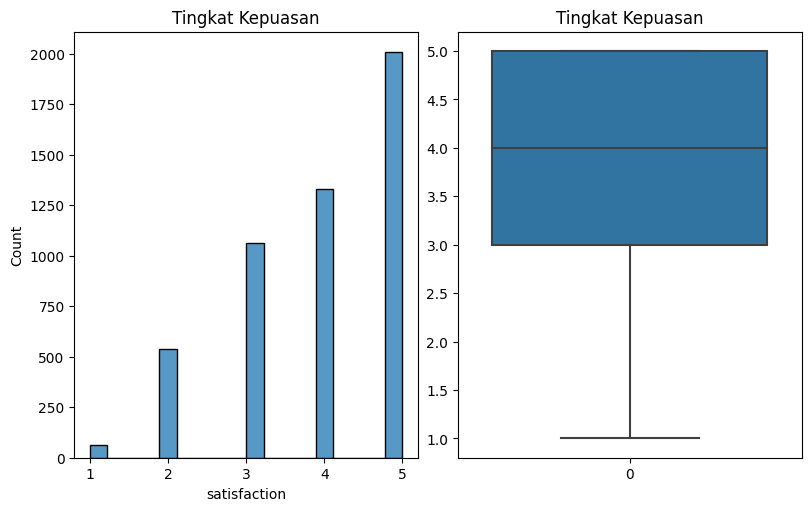

count    5000.000000
mean        3.938200
std         1.072106
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: satisfaction, dtype: float64


In [48]:
# satisfaction
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["satisfaction"], ax=ax[0])
sns.boxplot(data=df["satisfaction"], ax=ax[1])
ax[0].set_title("Tingkat Kepuasan")
ax[1].set_title("Tingkat Kepuasan")
plt.show()
print(df["satisfaction"].describe())

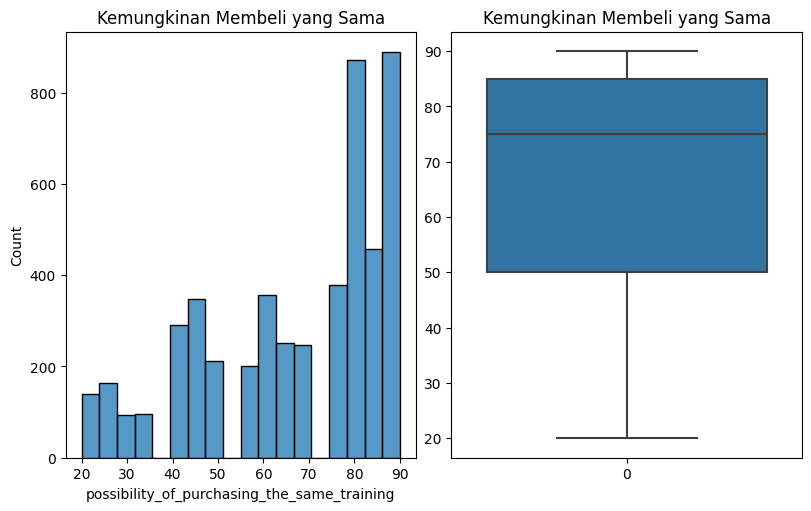

count    5000.000000
mean       66.859000
std        20.519097
min        20.000000
25%        50.000000
50%        75.000000
75%        85.000000
max        90.000000
Name: possibility_of_purchasing_the_same_training, dtype: float64


In [49]:
# possibility_of_purchasing_the_same_training
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["possibility_of_purchasing_the_same_training"], ax=ax[0])
sns.boxplot(data=df["possibility_of_purchasing_the_same_training"], ax=ax[1])
ax[0].set_title("Kemungkinan Membeli yang Sama")
ax[1].set_title("Kemungkinan Membeli yang Sama")
plt.show()
print(df["possibility_of_purchasing_the_same_training"].describe())

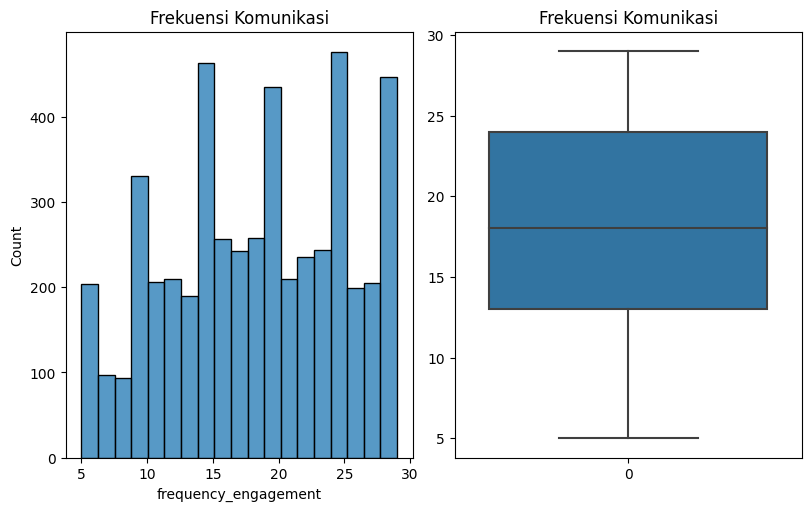

count    5000.00000
mean       18.27080
std         6.57709
min         5.00000
25%        13.00000
50%        18.00000
75%        24.00000
max        29.00000
Name: frequency_engagement, dtype: float64


In [50]:
# frequency_engagement
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["frequency_engagement"], ax=ax[0])
sns.boxplot(data=df["frequency_engagement"], ax=ax[1])
ax[0].set_title("Frekuensi Komunikasi")
ax[1].set_title("Frekuensi Komunikasi")
plt.show()
print(df["frequency_engagement"].describe())

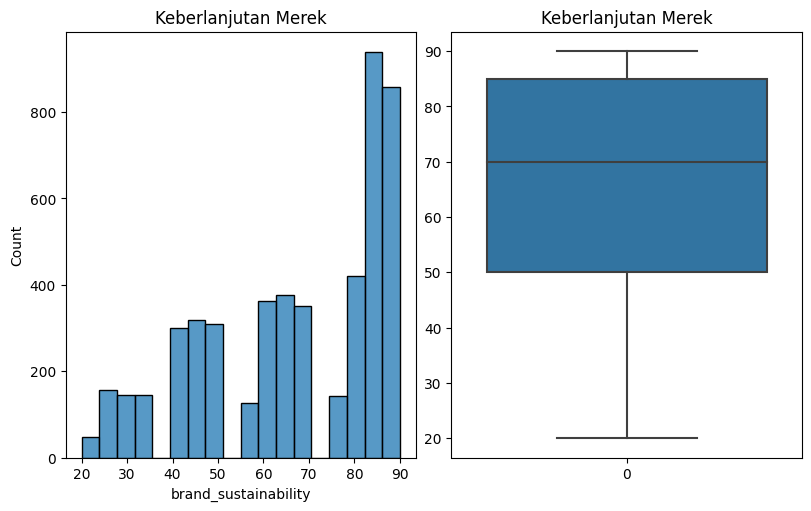

count    5000.000000
mean       67.077000
std        20.338973
min        20.000000
25%        50.000000
50%        70.000000
75%        85.000000
max        90.000000
Name: brand_sustainability, dtype: float64


In [51]:
# brand_sustainability
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["brand_sustainability"], ax=ax[0])
sns.boxplot(data=df["brand_sustainability"], ax=ax[1])
ax[0].set_title("Keberlanjutan Merek")
ax[1].set_title("Keberlanjutan Merek")
plt.show()
print(df["brand_sustainability"].describe())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   company_field                                5000 non-null   category
 1   level_training_process                       5000 non-null   int64   
 2   purchasing_time_patterns                     5000 non-null   category
 3   number_of_participants                       5000 non-null   int64   
 4   group                                        5000 non-null   category
 5   total_payment                                5000 non-null   float64 
 6   satisfaction                                 5000 non-null   int64   
 7   communication_channel                        5000 non-null   category
 8   complaints                                   5000 non-null   category
 9   communication_quality                        5000 non-null   ca

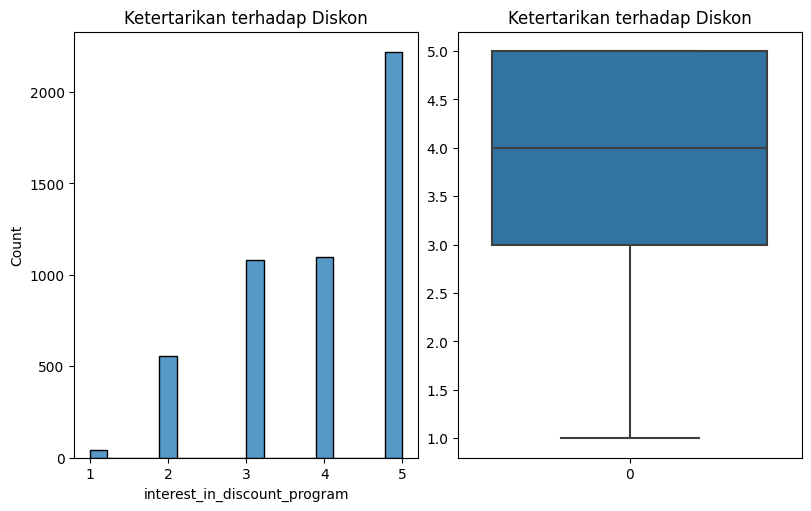

count    5000.000000
mean        3.978800
std         1.087836
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: interest_in_discount_program, dtype: float64


In [53]:
# interest_in_discount_program
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["interest_in_discount_program"], ax=ax[0])
sns.boxplot(data=df["interest_in_discount_program"], ax=ax[1])
ax[0].set_title("Ketertarikan terhadap Diskon")
ax[1].set_title("Ketertarikan terhadap Diskon")
plt.show()
print(df["interest_in_discount_program"].describe())

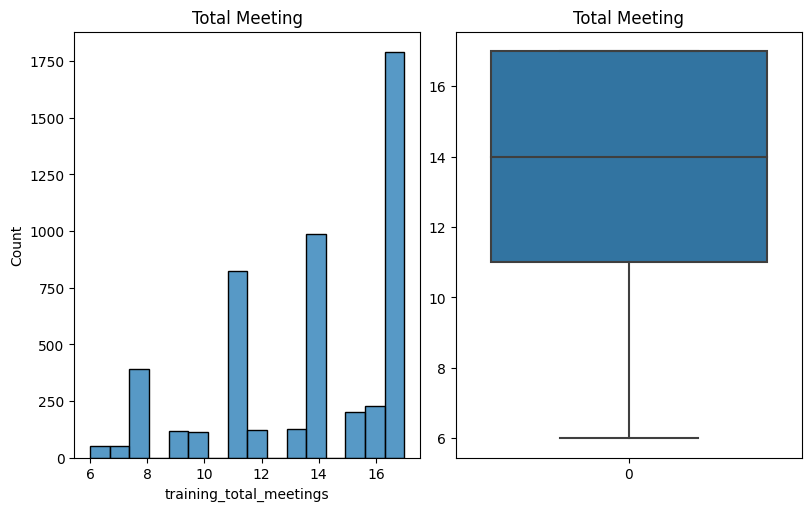

count    5000.000000
mean       13.808200
std         3.149952
min         6.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        17.000000
Name: training_total_meetings, dtype: float64


In [54]:
# training_total_meetings
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["training_total_meetings"], ax=ax[0])
sns.boxplot(data=df["training_total_meetings"], ax=ax[1])
ax[0].set_title("Total Meeting")
ax[1].set_title("Total Meeting")
plt.show()
print(df["training_total_meetings"].describe())

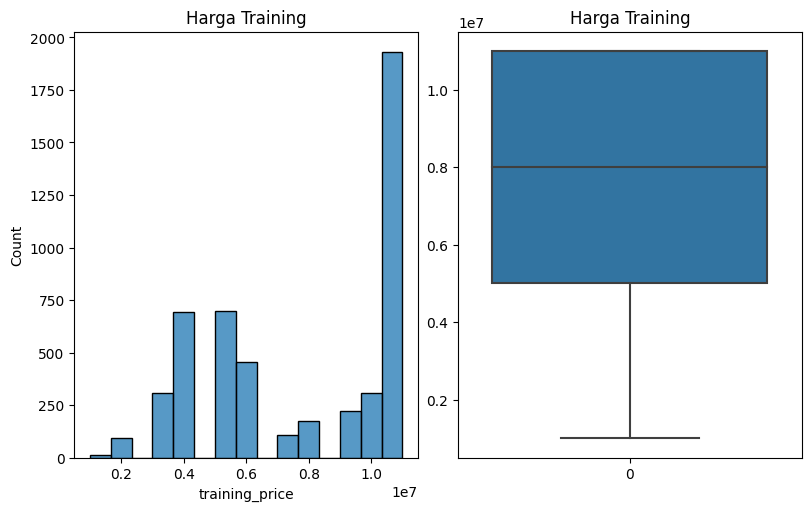

count    5.000000e+03
mean     7.714800e+06
std      3.140101e+06
min      1.000000e+06
25%      5.000000e+06
50%      8.000000e+06
75%      1.100000e+07
max      1.100000e+07
Name: training_price, dtype: float64


In [55]:
# training_price
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["training_price"], ax=ax[0])
sns.boxplot(data=df["training_price"], ax=ax[1])
ax[0].set_title("Harga Training")
ax[1].set_title("Harga Training")
plt.show()
print(df["training_price"].describe())

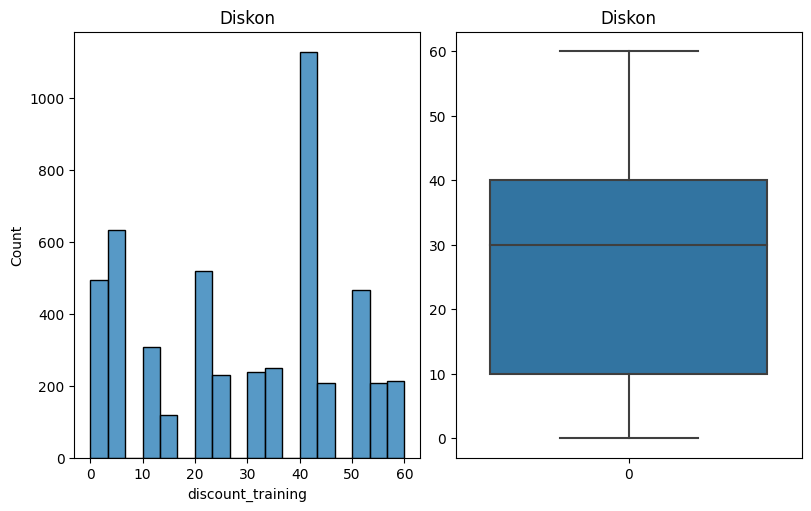

count    5000.000000
mean       28.362400
std        18.424249
min         0.000000
25%        10.000000
50%        30.000000
75%        40.000000
max        60.000000
Name: discount_training, dtype: float64


In [56]:
# discount_training
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["discount_training"], ax=ax[0])
sns.boxplot(data=df["discount_training"], ax=ax[1])
ax[0].set_title("Diskon")
ax[1].set_title("Diskon")
plt.show()
print(df["discount_training"].describe())